In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from voltagebudget import *
from fakespikes import util as fsutil

>>> 20 spikes generated after 39 iterations.


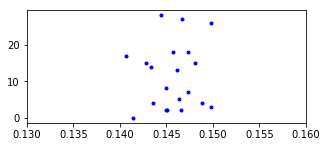

In [3]:
t = 0.3

n = 30
k = 20
t_stim = 0.14
dt = 1e-4
w = 1e-2
a = 100
ns, ts = util.k_spikes(t_stim, n, k, w, a0=a, a_step=1, max_iterations=500, dt=dt, seed=10)
plt.figure(figsize=(5, 12))
plt.subplot(511)
plt.plot(ts, ns, '.b')
plt.xlim(0.13, 0.16)

times = fsutil.create_times(t, dt)

In [23]:
N = 100
w_in = 0.3e-9
bias = 5e-10

f = 60 # 50
A = .6e-10

r_b = 0.0

window = [t_stim + 6e-3, t_stim + 9e-3]

ns_e, ts_e, vs = neurons.adex(t, N, 
                              ns, ts, 
                              w_in=0.4e-9,
                              bias=(5e-10, 5e-10 / 20),
                              a=(-1.0e-9, 1.0e-9),
                              b=(10e-12, 60.0e-12),
                              Ereset=(-48e-3, -55e-3),
                              f=f, A=A, phi=0,
                              r_b=r_b,
                              time_step=dt)

Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s


In [24]:
C = util.estimate_communication(times, ns_e, ts_e, window)
sigma_e = util.estimate_computation(times, ns_e, ts_e, window)

print("C {}, sigma_e {}".format(C, sigma_e))

C 0, sigma_e 0.0


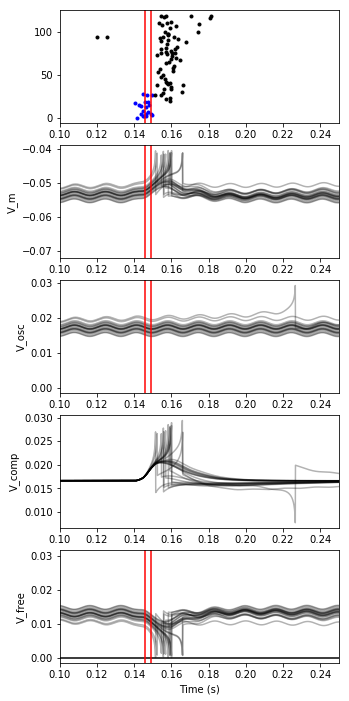

In [25]:
plt.figure(figsize=(5, 12))
plt.subplot(511)
plt.plot(ts, ns, '.b')
plt.plot(ts_e, ns_e + k, '.k')
plt.axvline(window[0], color='red')
plt.axvline(window[1], color='red')
plt.xlim(.10, .25)

plt.subplot(512)
for j in range(20):
    plt.plot(times, vs['vm'][j, :], 'k', alpha=0.3);
# plt.ylim(-70e-3, -50e-3)
plt.axvline(window[0], color='red')
plt.axvline(window[1], color='red')
plt.ylabel("V_m")
plt.xlim(.10, .25)

plt.subplot(513)
for j in range(20):
    plt.plot(times, vs['osc'][j, :], 'k', alpha=0.3);
# plt.axhline(-54e-3, color='black')
# plt.ylim(-70e-3, -50e-3)
plt.axvline(window[0], color='red')
plt.axvline(window[1], color='red')
plt.ylabel("V_osc")
plt.xlim(.10, .25)

plt.subplot(514)
for j in range(20):
    plt.plot(times, vs['comp'][j, :], 'k', alpha=0.3);
# plt.axhline(-54e-3, color='black')
# plt.ylim(-70e-3, -50e-3)
# plt.axvline(t_stim + 2e-3, color='red')
# plt.axvline(t_stim + 12e-3, color='red')
plt.ylabel("V_comp")
plt.xlim(.10, .25)

plt.subplot(515)
for j in range(20):
    plt.plot(times, vs['free'][j, :], 'k', alpha=0.3);
plt.axhline(0, color='black')
plt.ylabel("V_free")
plt.axvline(window[0], color='red')
plt.axvline(window[1], color='red')
plt.xlim(.10, .25)
plt.xlabel("Time (s)")

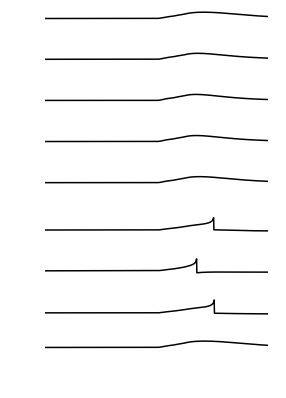

In [17]:
plt.figure(figsize=(4, 15))
for j in range(1, 10):
    plt.subplot(20, 1, j)
    plt.plot(times, vs['vm'][j, :], 'k', alpha=1);
    plt.axis('off')
    plt.xlim(.10, .18)